# Paris metro problem

Benjamin Schmitt DSTI Paris

## Rules

* The goal is to pass in one day by all the metro stations in Paris.

* You have to go at least once (though not necessarily one) by each of the Paris metro stations intramural, during a day.

* Authorized transportations are: the metro (however, the use of the bus, a car or a taxi, or even a bicycle, is prohibited).

* It is not necessary to browse the metro stations located outside the limits of Paris (it stops at stations with names in "porte ... ..").

* BUT it is not forbidden to leave Paris (eg. by going to the Boulogne Jean Jaurès station, which has an interest).

* If a station is crossed by several lines, it is not necessary (but not prohibited) to go as many times as there are lines that pass by.

* There is no need to stop at each station: cross enough.

* Finally, two stations are considered different if they have different names (including Châtelet is not the same station as Les Halles).

<span style="color:blue">One input: the Paris metro map on a txt file. The txt file contains the edges and vertices of our graph model.</span>

We have from 5am till 1am the day after to pass all metro station of the Paris network.

It means we have 20 hours maximum (or 72000 seconds).

## Loading the input text file

#### the file "metro_complet.txt" was split in 2 other txt files "Vertices.txt" and "Edges.txt"

In [1]:
Vertices = []

with open('Vertices.txt', 'r') as f:
        for line in f.readlines():
            Vertices.append(line.strip().split(' ',maxsplit=1))

In [2]:
print(len(Vertices)),Vertices[111]

376


(None, ['0111', 'Félix Faure'])

In [3]:
Edges = []

with open('Edges.txt', 'r') as f:
        for line in f.readlines():
            Edges.append(line.strip().split(' ',maxsplit=2))

In [4]:
print(len(Edges)),Edges[19],Edges[19][1]

933


(None, ['9', '78', '62'], '78')

In [5]:
TotalEdge=0
for i in range(len(Edges)):
    TotalEdge=TotalEdge+float(Edges[i][2])
    
print("TotalEdge time :" + str(TotalEdge) + " seconds")
print("TotalEdge time :" + str("{0:.2f}".format(TotalEdge/3600)) + " hours")

TotalEdge time :61716.0 seconds
TotalEdge time :17.14 hours


We see that the Total edge time is over 17 hours which is under the 20h hours mark.
So this constraint of our model shouldn't be a problem for the rest of the modelisation.

In [6]:
def index_to_name(path):
    '''
    convert the list of index of metro station to the actual name of the station
    
    input: list of index
    output: list of name based on the file "Vertices.txt"
    
    '''
    
    list_name=[]
    
    for i in path:
        list_name.append(Vertices[i][1])
        
    print(list_name)

## Greedy search for Travelling salesman problem

To transform the <span style="color:red"><b>travelling salesman problem</b></span> to our <span style="color:red"><b>Route inspection problem</b></span>, we need to change the cost function.

We do not need to go back to the first nodes of the path. we need to only travel to every nodes of the graph at least once.

### Creating the graph using NetworkX

references :
* https://networkx.github.io/documentation/latest/index.html
* https://en.wikipedia.org/wiki/Graph_theory

We are going to create a graph representing Paris metro network.

We have 376 nodes and 933 vertices for our graph.

In [7]:
import networkx as nx
G = nx.Graph()

In [9]:
'''creates the Graph instance
376 subway stations in Paris
'''

for i in range(len(Vertices)):
    G.add_node(i)

In [10]:
'''we add the Edges (or possible path) for every vertices(or subway station)'''

for i in range(len(Edges)):
    G.add_edge(int(Edges[i][0]), int(Edges[i][1]), weight=float(Edges[i][2]))

In [11]:
G[0][238]['weight']

41.0

In [12]:
 import matplotlib.pyplot as plt

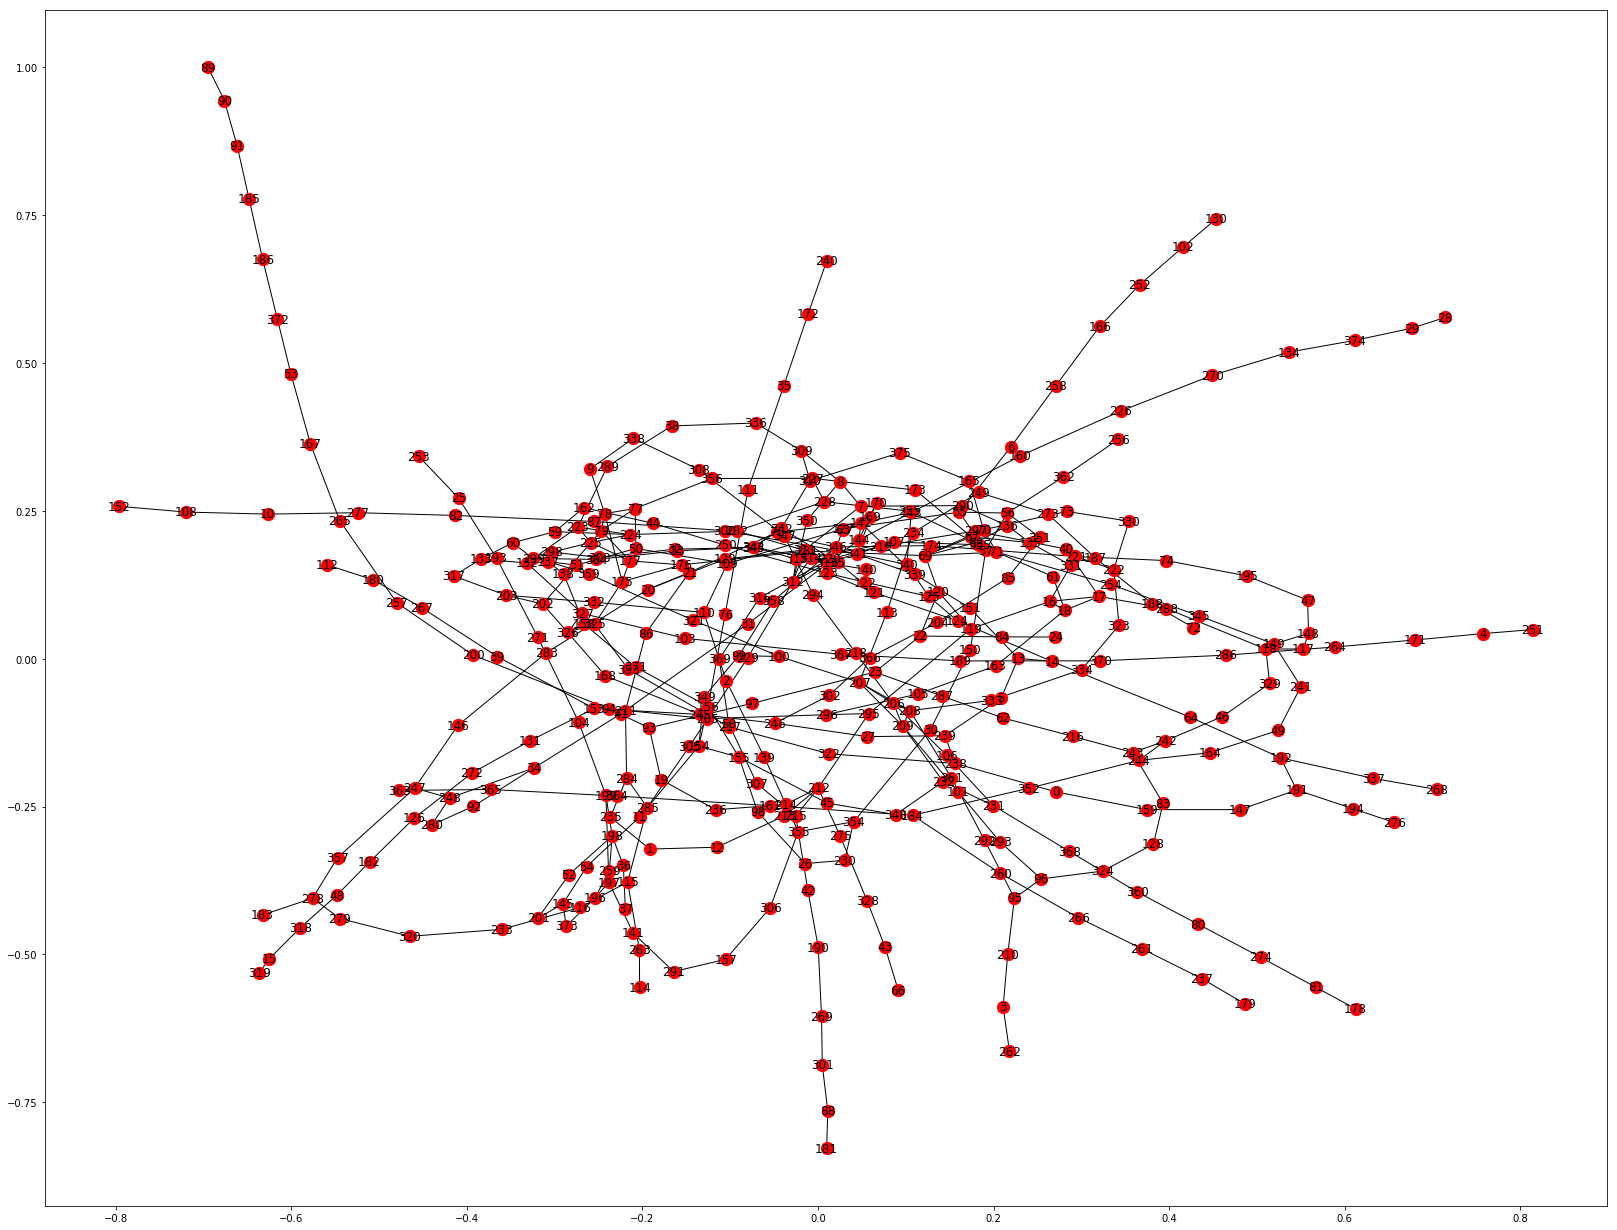

In [13]:
plt.figure(figsize=(28, 22))
nx.draw_networkx(G, node_size=150)
plt.show()

### Update map of Paris

We are going to make the updated map of the metro network of Paris by removing all the metro station outside Paris.

We only keep "Boulogne Jean Jaurès" station because it is useful to keep this station even if it is outside of Paris.

First we make the list of metro station that we want to delete

In [14]:
outside_paris = [89,90,91,185,186,372,53,167,181,88,301,66,43,328,319,15,318,48,182,126,114,112,180,183,152,108,10,178,81,130,102,134,374,29,28,363,364,365,161,179,237,37,253,25,193,251,4,171,72,188,187,252,166]

In [15]:
index_to_name(outside_paris)

['Créteil-Préfecture', 'Créteil-Université', "Créteil-l'Echat, Hôpital Henri Mondor", 'Maisons-Alfort les Juilliottes', 'Maisons-Alfort, Stade', 'École Vétérinaire de Maisons-Alfort', 'Charenton-Écoles', 'Liberté', 'Mairie de Montreuil', 'Croix de Chavaux', 'Robespierre', 'Château de Vincennes', 'Bérault', 'Saint-Mandé, Tourelle', 'Saint-Denis-Université', 'Basilique de Saint-Denis', 'Saint-Denis-Porte de Paris', 'Carrefour Pleyel', 'Mairie de Saint-Ouen', 'Garibaldi', 'Galliéni', 'Gabriel Péri, Asnières-Gennevilliers', 'Mairie de Clichy', 'Mairie des Lilas', 'La Courneuve, 8 Mai 1945', "Fort d'Aubervilliers", 'Aubervilliers-Pantin, Quatre Chemins', "Mairie d'Issy", 'Corentin Celton', 'Grande Arche de la Défense', 'Esplanade de la Défense', 'Hoche', 'Église de Pantin', 'Bobigny-Pantin, Raymond Queneau', 'Bobigny, Pablo Picasso', 'Villejuif, Louis Aragon', 'Villejuif, Léo Lagrange', 'Villejuif, P. Vaillant Couturier', 'Le Kremlin-Bicêtre', "Mairie d'Ivry", 'Pierre Curie', 'Boulogne, Pon

In [16]:
G2 = nx.Graph()

for i in range(len(Vertices)):
    G2.add_node(i)
    
for i in range(len(Edges)):
    G2.add_edge(int(Edges[i][0]), int(Edges[i][1]), weight=float(Edges[i][2]))

In [17]:
G2.remove_nodes_from(outside_paris)

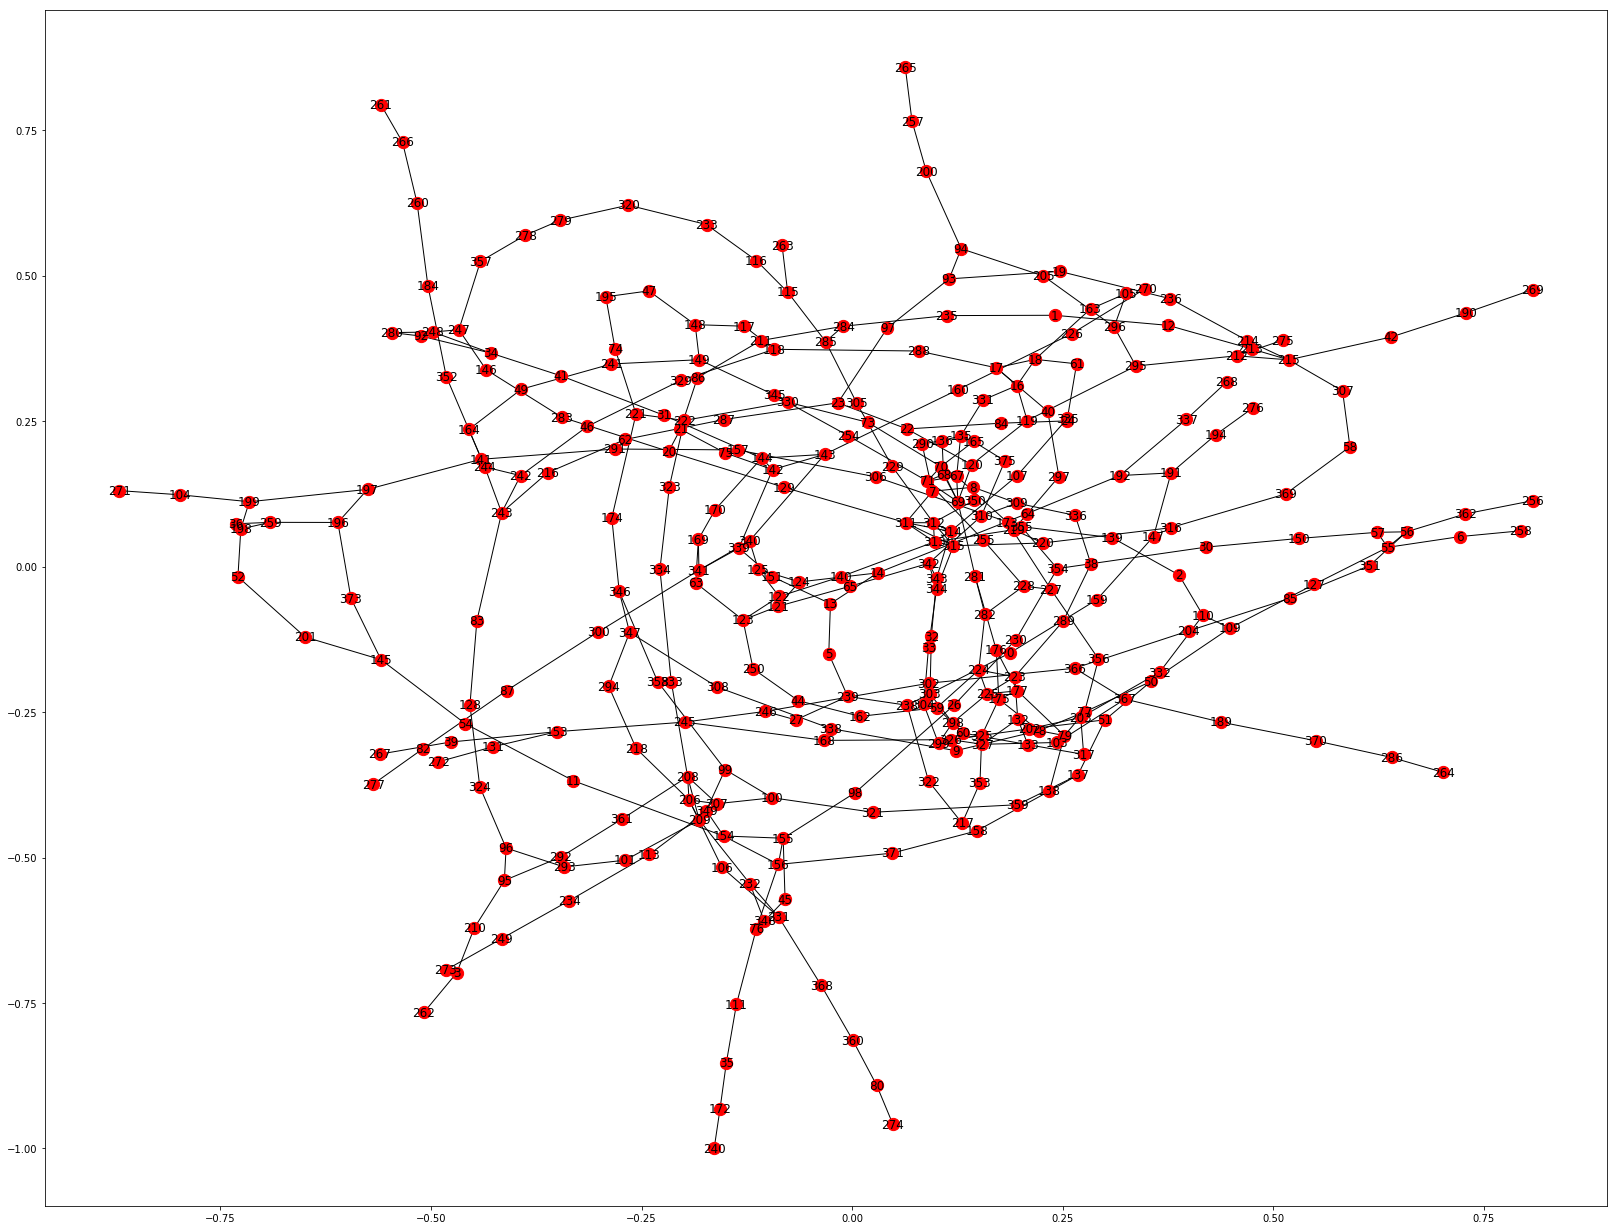

In [18]:
plt.figure(figsize=(28, 22))
nx.draw_networkx(G2, node_size=150)
plt.show()

In [19]:
print(len(list(G2.node)))

323


We manage to delete 52 station that are outside Paris

### Random path with Greedy search algorithm

We use a greedy search algorithm to create a complete path of the Paris metro. This algorithm is constitued of 2 loops:

First we decide the next station of our path using the edge with the minimum weight

if all neighbor station are visited we use a shortest path algorithm (dijkstra) to a random station

In [20]:
from random import choice

In [21]:
def next_station(index,visited=[],graph = G2):
    '''return the next station decided by minimum weight of the path
    
    If all station are visited at least once, thius algorithm return -1
    
    '''
    neighbor_station = sorted(graph[index].items(), key=lambda edge: edge[1]['weight'])
    
    #list of all possible neighbor station
    possible_station=[i[0] for i in neighbor_station]
    
    #compare the list of possible station with the list of previously visited station
    if not set(possible_station).issubset(set(visited)):
        
        #for loop on the list of neighbor station sorted by minimum weight
        for i in range(0,len(neighbor_station)):
            if neighbor_station[i][0] not in visited:
                return([neighbor_station[i][0],neighbor_station[i][1]['weight']])
        
    else:      
        return -1

In [22]:
def getRandomPath(graph = G2, starting_position = -1,show_result = True):
    '''
    Get a random path that goes through all the station of Paris at least once
    this is our basic algorithm
    
    '''
    visited_node=[]
    random_path=[]
    Timeleft = 72000.0

    '''
    random initial position if starting_position = -1
    otherwise starting position defined by the function parameter
    '''
    if starting_position == -1:
        initial_node = choice(list(graph.nodes()))
    else:
        initial_node = starting_position
    
    visited_node=[initial_node]
    random_path=[initial_node]
    
    while Timeleft > 0.0:
        a=next_station(random_path[-1],visited=visited_node,graph=graph)
        
        if a == -1:
            
            '''
            dijkstra to a random NOT VISITED station
            '''
            
            not_visited_node = [x for x in list(graph.nodes()) if x not in visited_node]
            random_station = choice(not_visited_node)
            
            dijkstra = nx.dijkstra_path(graph, source = random_path[-1], target = random_station, weight='weight')
            
            Time_dijkstra = sum([graph[dijkstra[i]][dijkstra[i+1]]['weight'] for i in range(0,len(dijkstra)-1)])
            
            visited_node.extend(dijkstra)
            visited_node=list(set(visited_node))
            
            random_path.extend(dijkstra)
            
            #time of dijkstra path                                   
            Timeleft = Timeleft - Time_dijkstra
            
        else:
            
            visited_node.append(a[0])
            visited_node=list(set(visited_node))

            random_path.append(a[0])

            Timeleft = Timeleft - a[1]
            
                       
        #break if the algorithm found every station
        if len(visited_node) == len(graph.node):
            break
        
    if show_result == True:
        print(random_path)
        print("Number of station found =",len(visited_node),"Time remaining =",Timeleft)
    
    return(random_path,len(visited_node),Timeleft)

In [25]:
getRandomPath(G,starting_position = 216,show_result=False)

([216,
  62,
  287,
  23,
  97,
  93,
  19,
  236,
  214,
  212,
  295,
  119,
  16,
  331,
  135,
  67,
  173,
  227,
  356,
  77,
  50,
  109,
  127,
  55,
  6,
  258,
  166,
  252,
  102,
  130,
  130,
  102,
  252,
  166,
  258,
  6,
  55,
  127,
  109,
  110,
  332,
  203,
  317,
  133,
  60,
  59,
  162,
  44,
  250,
  123,
  63,
  169,
  341,
  300,
  87,
  82,
  277,
  10,
  108,
  152,
  152,
  108,
  10,
  277,
  82,
  87,
  300,
  341,
  169,
  63,
  123,
  121,
  124,
  14,
  64,
  192,
  337,
  268,
  268,
  337,
  192,
  64,
  14,
  124,
  121,
  65,
  342,
  343,
  32,
  303,
  298,
  225,
  177,
  79,
  138,
  158,
  371,
  156,
  76,
  111,
  35,
  172,
  240,
  240,
  172,
  35,
  111,
  76,
  156,
  155,
  98,
  26,
  230,
  354,
  30,
  150,
  57,
  56,
  351,
  85,
  204,
  366,
  302,
  246,
  27,
  239,
  5,
  13,
  151,
  339,
  142,
  75,
  21,
  86,
  211,
  284,
  235,
  1,
  12,
  213,
  215,
  42,
  190,
  269,
  301,
  88,
  181,
  181,
  88,
  301,
  269,

### Selecting the best random path

We are going to run the algorithm "getRandomPath" multiple time and keep the best solution based on number of station reached and Timeleft

In [26]:
import time

In [29]:
def multiple_random_path(n,starting_position = -1 , graph = G2):
    '''
    run the getRandomPath algorithm multiple time and keep the best solution
    
    '''
    best = 0
    best_time=0
    best_path=[]
    
    sum_timeleft = 0
    

    
    start=time.time()
    
    for _ in range(n):
        
        if starting_position == -1:
            a = getRandomPath(graph,show_result=False)
        else:
            a = getRandomPath(graph, starting_position = starting_position , show_result=False)
        
        
        # first test based on number of station reached
        if a[1] > best and a[1] < len(graph.node)  :
            best = a[1]
            best_path=a[0]
            best_time=a[2]
        
        # second test based on Timeleft
        if a[1] == len(graph.node) :
            if a[2] >= best_time:
                best = a[1]
                best_path=a[0]
                best_time=a[2]
                
        #compute the sum of Timeleft
        
        if a[2] > 0:
            sum_timeleft += a[2]
        
            
    end=time.time()
    
    average_timeleft = sum_timeleft/n
    
    print("Highest number of station :",best)
    print("Elapsed time :","{0:.2f}".format(end-start),"seconds")
    print("Time left ","{0:.2f}".format(best_time),"seconds or","{0:.2f}".format(best_time/3600),"hours")
    print("Time of the best path :","{0:.2f}".format(72000-best_time),"seconds or","{0:.2f}".format((72000-best_time)/3600),"hours")
    print("Length of the path",len(best_path))
    
    print("Best path :",best_path)
    
    #return the best path with station name + the average time left of the n algorithm
    return(best_path,index_to_name(best_path),average_timeleft)

In [28]:
multiple_random_path(10,graph = G2)

Highest number of station : 323
Elapsed time : 0.24 seconds
Time left  38563.00 seconds or 10.71 hours
Time of the best path : 33437.00 seconds or 9.29 hours
Length of the path 645
Best path : [83, 243, 216, 62, 287, 23, 97, 93, 19, 236, 214, 212, 295, 119, 16, 331, 135, 67, 173, 227, 356, 77, 50, 109, 127, 55, 6, 258, 258, 6, 55, 56, 351, 85, 204, 366, 302, 246, 27, 239, 5, 13, 151, 339, 340, 143, 160, 226, 270, 270, 226, 160, 143, 340, 341, 169, 63, 123, 250, 44, 162, 59, 60, 133, 317, 203, 332, 110, 2, 139, 355, 306, 157, 291, 141, 197, 199, 104, 271, 271, 104, 199, 197, 141, 291, 157, 306, 355, 139, 2, 110, 332, 203, 317, 133, 60, 59, 162, 44, 250, 123, 63, 169, 170, 144, 31, 41, 34, 248, 280, 92, 92, 34, 248, 247, 146, 283, 20, 129, 311, 314, 107, 335, 61, 18, 163, 105, 296, 205, 94, 200, 257, 265, 265, 257, 200, 94, 205, 296, 105, 163, 18, 17, 288, 118, 329, 46, 242, 244, 352, 184, 260, 266, 261, 261, 266, 260, 184, 352, 244, 164, 49, 241, 149, 345, 254, 71, 255, 228, 282, 224, 2

(None, 37141.6)

### Comparing starting position

We are going to compare the effectiveness of our algorithm based on the starting position of "getRandomPath"

In [31]:
%%capture


start=time.time()
array_position = []

available_starting_position = [x for x in range(len(G.node)) if x not in outside_paris]

for i in available_starting_position:
    a = multiple_random_path(100,i,graph=G2)
    array_position.append([i,a[1]])
    
end=time.time()

elapsed_time_comparison = end - start

In [32]:
print(elapsed_time_comparison)

874.4679770469666


In [34]:
print(sorted(array_position,reverse=True,key=lambda x: x[1]))

[[24, 38153.38], [271, 38117.77], [272, 38083.01], [68, 37985.76], [201, 37981.56], [275, 37963.92], [373, 37960.8], [36, 37933.47], [277, 37928.36], [259, 37893.29], [196, 37844.61], [269, 37842.91], [265, 37832.06], [273, 37828.85], [198, 37804.36], [261, 37803.18], [258, 37803.17], [340, 37775.73], [270, 37756.04], [329, 37680.54], [300, 37678.82], [267, 37673.05], [240, 37643.26], [87, 37612.62], [249, 37606.43], [325, 37580.77], [331, 37562.4], [203, 37547.97], [281, 37544.14], [135, 37511.25], [136, 37506.25], [50, 37500.03], [311, 37486.6], [129, 37484.78], [215, 37483.15], [119, 37482.38], [304, 37460.32], [210, 37456.29], [257, 37454.37], [9, 37453.76], [356, 37446.79], [361, 37441.93], [224, 37441.11], [274, 37435.09], [280, 37431.78], [137, 37431.24], [158, 37426.57], [341, 37425.19], [176, 37415.48], [264, 37413.59], [262, 37396.11], [11, 37395.37], [170, 37390.43], [96, 37387.66], [97, 37376.31], [159, 37368.2], [288, 37357.36], [263, 37356.23], [113, 37351.19], [164, 3734

In [35]:
#print the top 10 of best starting position

print(sorted(array_position,reverse=True,key=lambda x: x[1])[:10])

[[24, 38153.38], [271, 38117.77], [272, 38083.01], [68, 37985.76], [201, 37981.56], [275, 37963.92], [373, 37960.8], [36, 37933.47], [277, 37928.36], [259, 37893.29]]


the starting position doesn't influence much the efficiency of the algorithm

### Final result

We make the final prediction using 1 000 000 iteration to be sure to converge to a minima (even if it's not the global minimum of our problem)

In [30]:
final_result = multiple_random_path(1000000,graph = G2)

Highest number of station : 323
Elapsed time : 22928.91 seconds
Time left  44969.00 seconds or 12.49 hours
Time of the best path : 27031.00 seconds or 7.51 hours
Length of the path 522
Best path : [341, 300, 87, 82, 277, 277, 82, 87, 300, 341, 339, 151, 13, 5, 239, 27, 246, 302, 366, 204, 85, 351, 56, 362, 256, 256, 362, 56, 57, 150, 30, 354, 230, 26, 98, 155, 156, 76, 111, 35, 172, 240, 240, 172, 35, 111, 76, 156, 371, 158, 138, 79, 177, 225, 298, 303, 32, 343, 314, 311, 129, 20, 283, 146, 247, 357, 278, 279, 320, 233, 116, 115, 263, 263, 115, 285, 305, 229, 312, 350, 8, 309, 336, 38, 289, 223, 225, 177, 79, 78, 9, 338, 308, 347, 294, 218, 206, 106, 231, 368, 360, 80, 274, 274, 80, 360, 368, 231, 106, 206, 208, 333, 334, 323, 222, 330, 73, 70, 165, 375, 310, 342, 65, 121, 124, 14, 64, 192, 337, 268, 268, 337, 192, 64, 14, 124, 121, 65, 342, 343, 314, 107, 335, 61, 18, 163, 105, 296, 205, 94, 200, 257, 265, 265, 257, 200, 94, 205, 296, 295, 119, 16, 331, 135, 67, 173, 227, 356, 77, 50,

In [31]:
print(final_result)

([341, 300, 87, 82, 277, 277, 82, 87, 300, 341, 339, 151, 13, 5, 239, 27, 246, 302, 366, 204, 85, 351, 56, 362, 256, 256, 362, 56, 57, 150, 30, 354, 230, 26, 98, 155, 156, 76, 111, 35, 172, 240, 240, 172, 35, 111, 76, 156, 371, 158, 138, 79, 177, 225, 298, 303, 32, 343, 314, 311, 129, 20, 283, 146, 247, 357, 278, 279, 320, 233, 116, 115, 263, 263, 115, 285, 305, 229, 312, 350, 8, 309, 336, 38, 289, 223, 225, 177, 79, 78, 9, 338, 308, 347, 294, 218, 206, 106, 231, 368, 360, 80, 274, 274, 80, 360, 368, 231, 106, 206, 208, 333, 334, 323, 222, 330, 73, 70, 165, 375, 310, 342, 65, 121, 124, 14, 64, 192, 337, 268, 268, 337, 192, 64, 14, 124, 121, 65, 342, 343, 314, 107, 335, 61, 18, 163, 105, 296, 205, 94, 200, 257, 265, 265, 257, 200, 94, 205, 296, 295, 119, 16, 331, 135, 67, 173, 227, 356, 77, 50, 109, 127, 55, 6, 258, 258, 6, 55, 127, 109, 110, 332, 203, 317, 133, 60, 59, 162, 44, 250, 123, 63, 169, 170, 144, 31, 41, 34, 248, 280, 92, 92, 34, 41, 31, 144, 142, 75, 21, 86, 211, 284, 235, 1

Our final result is a path of length 522 that visit every 323 station inside paris.

This path takes 7.51 hours which is the best I found